In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_original = pd.read_csv("train.csv")
train_original.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train = train_original[['text', 'target']]
train['longitud'] = train['text'].map(lambda x: len(x))
train.head()

C:\Users\Digodat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,target,longitud
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


In [342]:
train = train[['target', 'longitud']]
print('LONGITUD MINIMO:', train['longitud'].min())
print('LONGITUD PROMEDIO:', train['longitud'].mean())
print('LONGITUD MAXIMO:', train['longitud'].max())

LONGITUD MINIMO: 7
LONGITUD PROMEDIO: 101.03743596479706
LONGITUD MAXIMO: 157


In [8]:
verdaderos = train[train['target'] == 1]
verdaderos = verdaderos.rename(columns={'target': 'verdaderos'})
longPromedioVerdaderos = verdaderos['longitud'].mean()
print('LONGITUD PROMEDIO VERDADEROS: ', longPromedioVerdaderos)
verdaderos = verdaderos.groupby('longitud').count().reset_index()
verdaderos.head()

LONGITUD PROMEDIO VERDADEROS:  108.11342097217977


,longitud,text,verdaderos
0,14,1,1
1,17,1,1
2,18,2,2
3,19,1,1
4,20,2,2


In [39]:
falsos = train[train['target'] == 0]
falsos = falsos.rename(columns={'target': 'falsos'})
longPromedioFalsos = falsos['longitud'].mean()
print('LONGITUD PROMEDIO FALSOS: ', longPromedioFalsos)
falsos = falsos.groupby('longitud').count().reset_index()
falsos.head()

LONGITUD PROMEDIO FALSOS:  95.70681713496084


,longitud,text,falsos
0,7,3,3
1,8,4,4
2,9,2,2
3,10,2,2
4,11,4,4


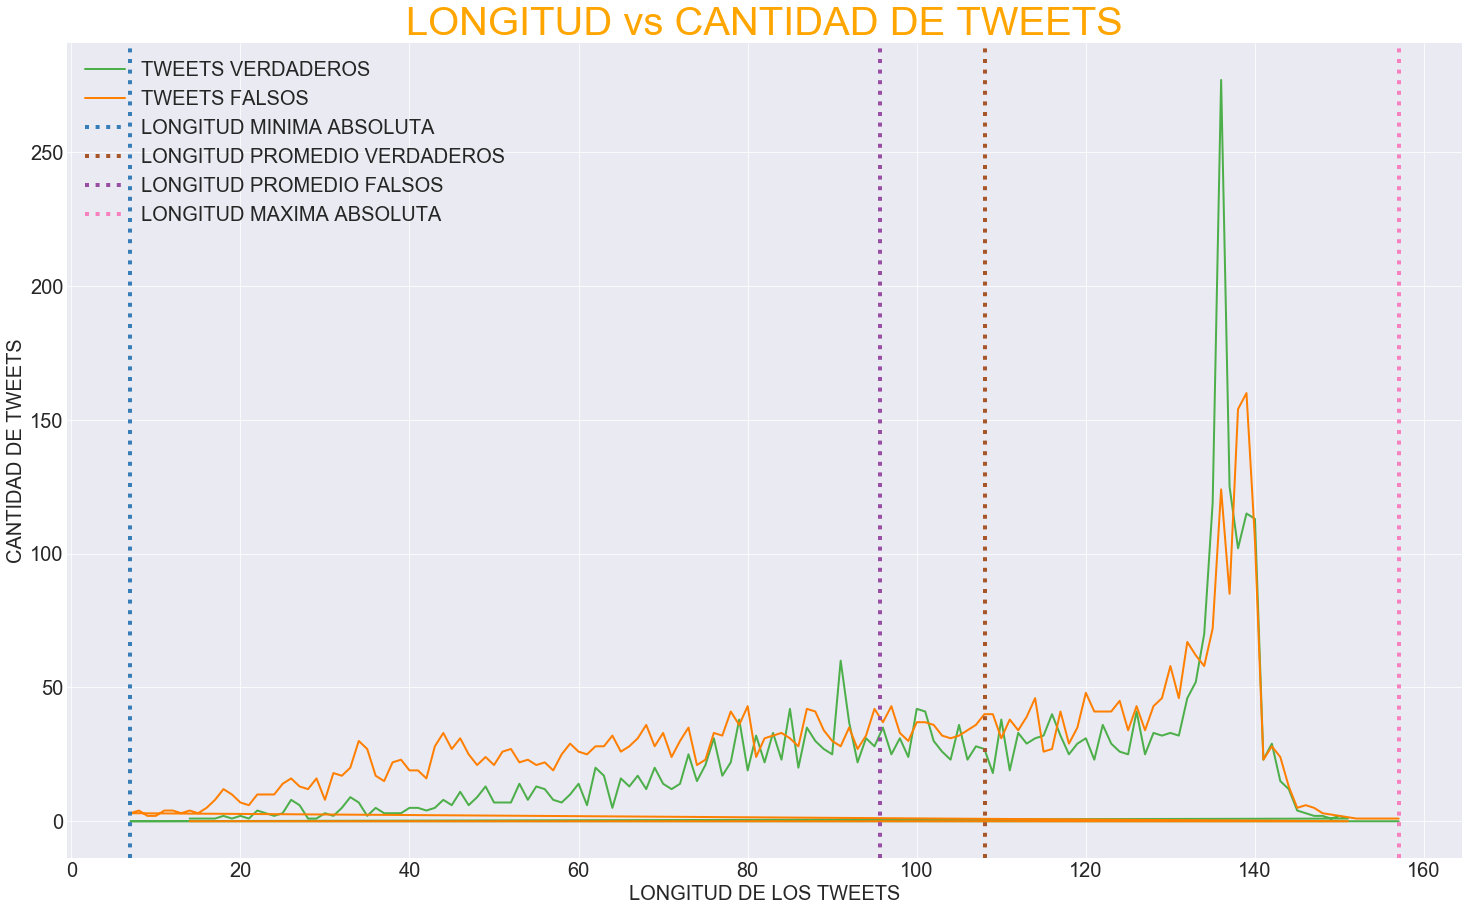

In [42]:
concat = pd.concat([verdaderos, falsos]).fillna(0)
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.plot(concat['longitud'], concat['verdaderos'], marker='', color=palette(2), linewidth=2, label='TWEETS VERDADEROS')
plt.plot(concat['longitud'], concat['falsos'], marker='', color=palette(4), linewidth=2, label='TWEETS FALSOS')
plt.axvline(train['longitud'].min(), concat['verdaderos'].min(), concat['verdaderos'].max(), label='LONGITUD MINIMA ABSOLUTA', color=palette(1), linewidth=4, linestyle=':')
plt.axvline(longPromedioVerdaderos, concat['verdaderos'].min(), concat['verdaderos'].max(), label='LONGITUD PROMEDIO VERDADEROS', color=palette(6), linewidth=4, linestyle=':')
plt.axvline(longPromedioFalsos, concat['verdaderos'].min(), concat['verdaderos'].max(), label='LONGITUD PROMEDIO FALSOS', color=palette(3), linewidth=4, linestyle=':')
plt.axvline(train['longitud'].max(), concat['verdaderos'].min(), concat['verdaderos'].max(), label='LONGITUD MAXIMA ABSOLUTA', color=palette(7), linewidth=4, linestyle=':')
plt.legend()

# Add titles
plt.title("LONGITUD vs CANTIDAD DE TWEETS", loc='center', fontsize=40, fontweight=0, color='orange')
plt.xlabel("LONGITUD DE LOS TWEETS")
plt.ylabel("CANTIDAD DE TWEETS")
plt.rcParams["figure.figsize"] = [35, 15]
plt.rcParams["font.size"] = 20